Titanic - Machine Learning from Disaster

The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled train.csv and the other is titled test.csv.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The test.csv dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

Check out the “Data” tab to explore the datasets even further. Once you feel you’ve created a competitive model, submit it to Kaggle to see where your model stands on our leaderboard against other Kagglers.

VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

Setup Imports and Variables

In [2]:
import numpy as np 
import pandas as pd
import pylab as plt

#set up defaults for matplotlib figures.
plt.rc('figure', figsize = (10,5))

#defaults for figures with subplots
figsize_with_subplots = (10,5)

#defaults figures with histograms
bin_size = 10

Explore the Data.

In [3]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Type 'object' is a string for pandas, which poses problems with machine learning algorithms. If we want to use these as features, we'll need to convert these to number representations.

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age, Cabin, and Embarked are missing values. Cabin has too many missing values, whereas we might be able to infer values for Age and Embarked.

Generate various descriptive statistics on the DataFrame:

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now that we have a general idea of the data set contents, we can dive deeper into each column. We'll be doing exploratory data analysis and cleaning data to setup 'features' we'll be using in our machine learning algorithms.

Plot a few features to get a better idea of each:

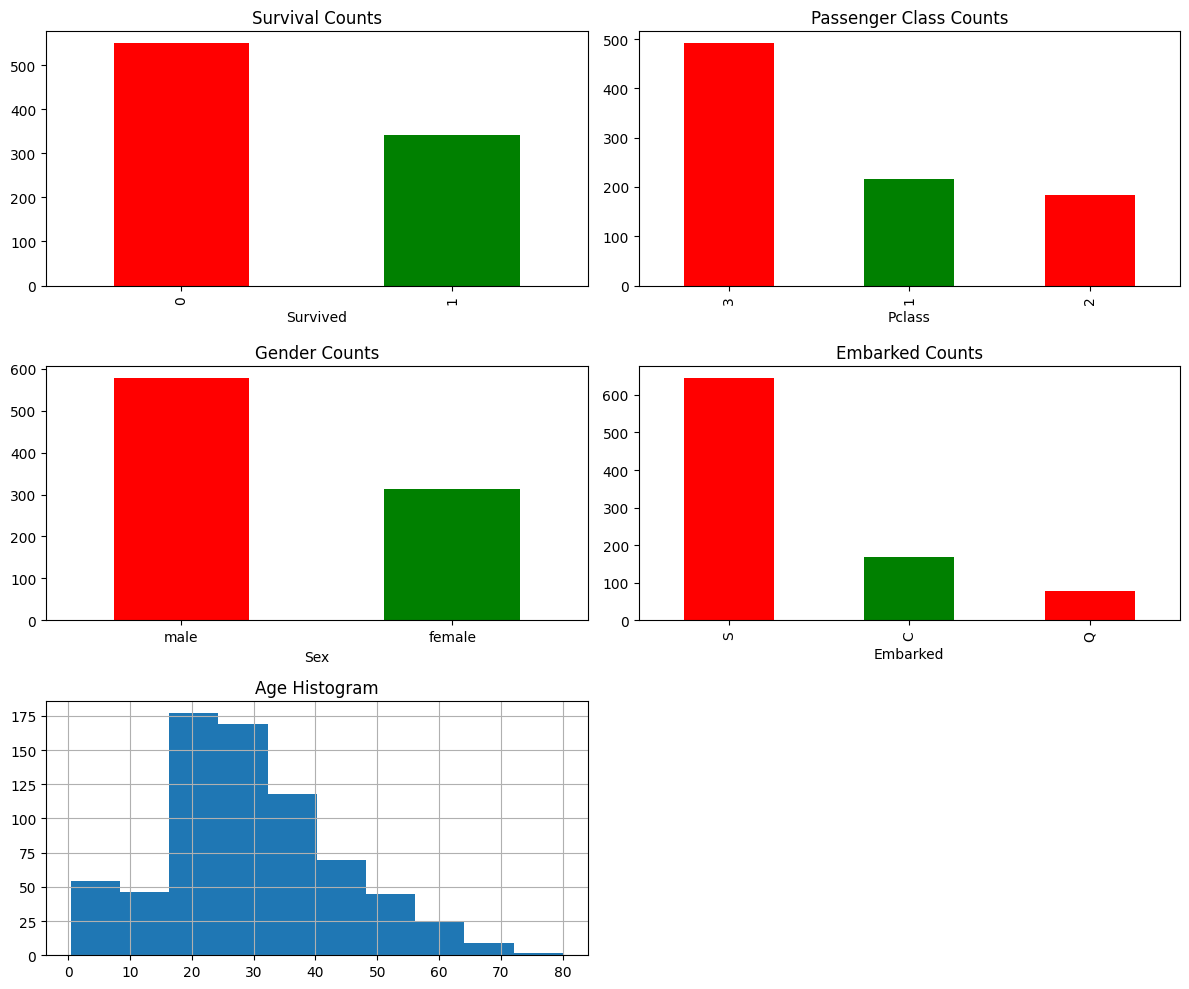

In [8]:
#set up a grid of plots
fig = plt.figure(figsize=(12, 10))
fig_dims = (3,2)



#plot death and survival counts
plt.subplot2grid(fig_dims, (0,0))
df_train['Survived'].value_counts().plot(kind='bar', title='Survival Counts', color=['red', 'green'])

#plot Pclass counts
plt.subplot2grid(fig_dims, (0,1))
df_train['Pclass'].value_counts().plot(kind='bar', title='Passenger Class Counts', color=['red', 'green'])

#plot sex counts
plt.subplot2grid(fig_dims, (1,0))
df_train['Sex'].value_counts().plot(kind='bar', title='Gender Counts', color=['red', 'green'])

plt.xticks(rotation=0)

#plot embarked counts
plt.subplot2grid(fig_dims, (1,1))
df_train['Embarked'].value_counts().plot(kind='bar', title='Embarked Counts', color=['red', 'green'])

#plot age histogram
plt.subplot2grid(fig_dims, (2,0))
df_train['Age'].hist()
plt.title('Age Histogram')


plt.tight_layout()
plt.show()

Next we'll explore various features to view their impact on survival rates.

Feature: Passenger Classes
From our exploratory data analysis in the previous section, we see there are three passenger classes: First, Second, and Third class. We'll determine which proportion of passengers survived based on their passenger class.

Generate a cross tab of Pclass and Survived:

In [9]:
pclass_xt = pd.crosstab(df_train['Pclass'],df_train['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Text(0, 0.5, 'Survival Rate')

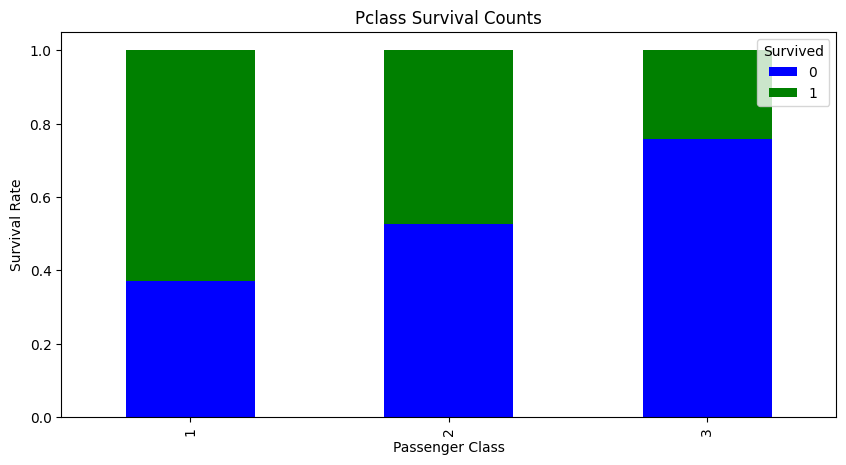

In [10]:
#plot the crosstab
#Normalize the crosstab to 1 

pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct.plot(kind='bar', stacked=True, title='Pclass Survival Counts', color=['blue', 'green'])

plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

We can see that passenger class seems to have a significant impact on whether a passenger survived. Those in First Class the highest chance for survival.

Feature: Sex
Gender might have also played a role in determining a passenger's survival rate. We'll need to map Sex from a string to a number to prepare it for machine learning algorithms.

Generate a mapping of Sex from a string to a number representation:

In [11]:
sexes = sorted(df_train['Sex'].unique())
gender_mappings = dict(zip(sexes,range(0, len(sexes) + 1)))
gender_mappings

{'female': 0, 'male': 1}

Transform Sex from a string to a number representation:

In [12]:
df_train['Sex_Val'] = df_train['Sex'].map(gender_mappings).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Plot a normalized cross tab for Sex_Val and Survived:

<Axes: title={'center': 'Survival Rate By Sex'}, xlabel='Sex_Val'>

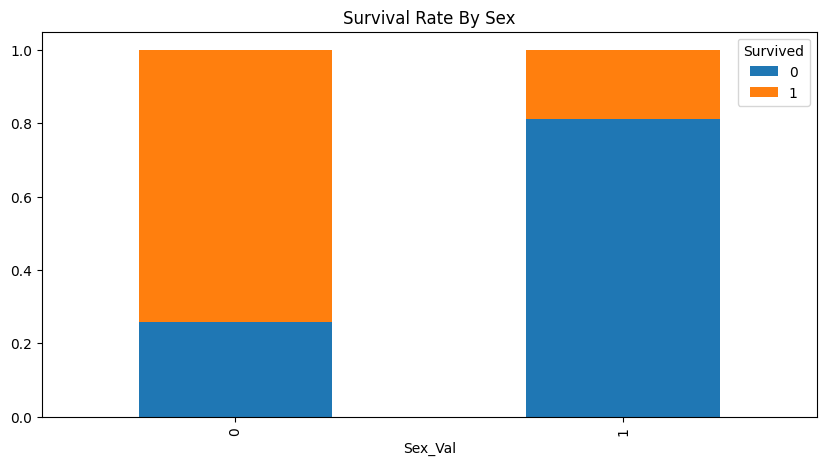

In [13]:
sex_val_xt = pd.crosstab(df_train['Sex_Val'], df_train['Survived'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float),axis=0)
sex_val_xt_pct.plot(kind= 'bar', stacked = 'True', title = 'Survival Rate By Sex')

The majority of females survived, whereas the majority of males did not.

Next we'll determine whether we can gain any insights on survival rate by looking at both Sex and Pclass.

Count males and females in each Pclass:

In [14]:

passenger_class = sorted(df_train['Pclass'].unique())

for p_class in passenger_class:
    print('M:', p_class, len(df_train[(df_train['Sex'] == 'male') & 
                                     (df_train['Pclass'] == p_class)]))
    print('F:', p_class, len(df_train[(df_train['Sex'] == 'female') &
                                     (df_train['Pclass'] == p_class)]))



M: 1 122
F: 1 94
M: 2 108
F: 2 76
M: 3 347
F: 3 144


Plot survival rate by Sex and Pclass:

Text(0, 0.5, 'Survival Rate')

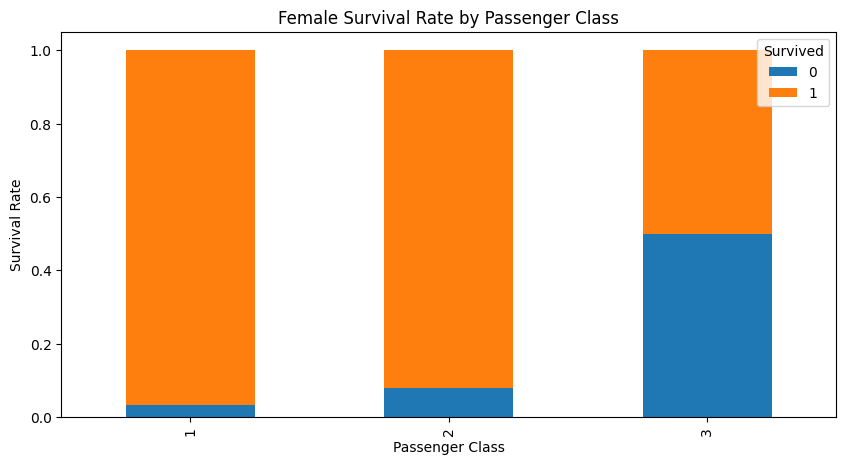

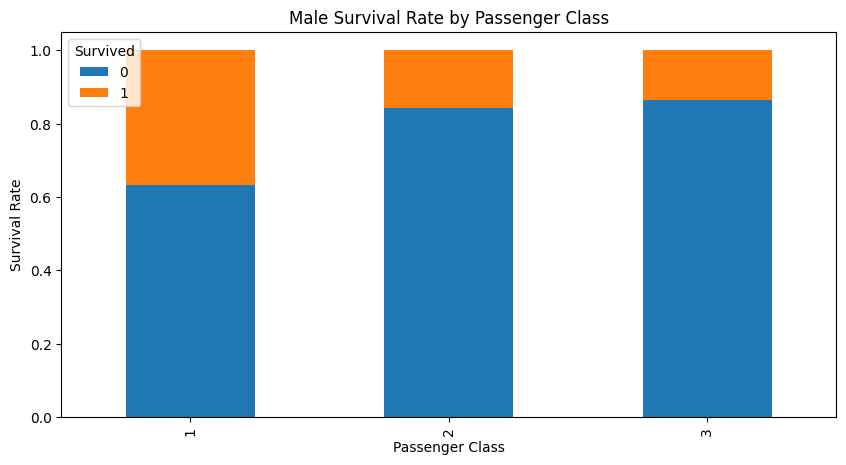

In [15]:
# Plot survival rate by Sex
females_df = df_train[df_train['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], df_train['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Plot survival rate by Pclass
males_df = df_train[df_train['Sex'] == 'male']
males_xt = pd.crosstab(males_df['Pclass'], df_train['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

The vast majority of females in First and Second class survived. Males in First class had the highest chance for survival.

Feature: Embarked
The Embarked column might be an important feature but it is missing a couple data points which might pose a problem for machine learning algorithms:

In [16]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


Prepare to map Embarked from a string to a number representation:

In [17]:
embarked_locs = sorted(df_train['Embarked'].dropna().unique())
embarked_locs_mappings = dict(zip(embarked_locs, range(0, len(embarked_locs))))
embarked_locs_mappings

{'C': 0, 'Q': 1, 'S': 2}

Transform Embarked from a string to a number representation to prepare it for machine learning algorithms:

In [18]:
df_train['Embarked_Val'] = df_train['Embarked'].map(embarked_locs_mappings).astype('Int64')
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,1,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,1,1


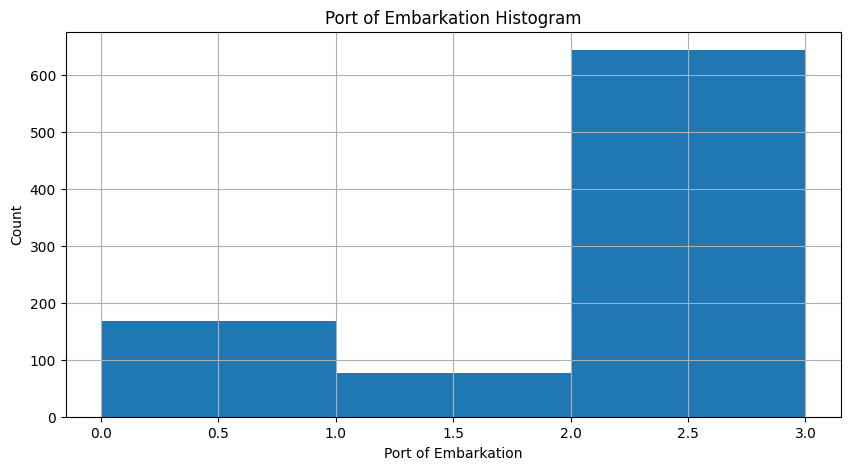

In [19]:
df_train['Embarked_Val'].hist(bins=len(embarked_locs), range=(0, 3))
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

Since the vast majority of passengers embarked in 'S': 3, we assign the missing values in Embarked to 'S':

In [20]:
if len(df_train[df_train['Embarked'].isnull()]) > 0:
    df_train['Embarked_Val'] = df_train['Embarked_Val'].fillna(embarked_locs_mappings['S'])

Verify we do not have any more NaNs for Embarked_Val:

In [21]:
df_train['Embarked_Val'].unique()

<IntegerArray>
[2, 0, 1]
Length: 3, dtype: Int64

Plot a normalized cross tab for Embarked_Val and Survived:

Text(0, 0.5, 'Survival Rate')

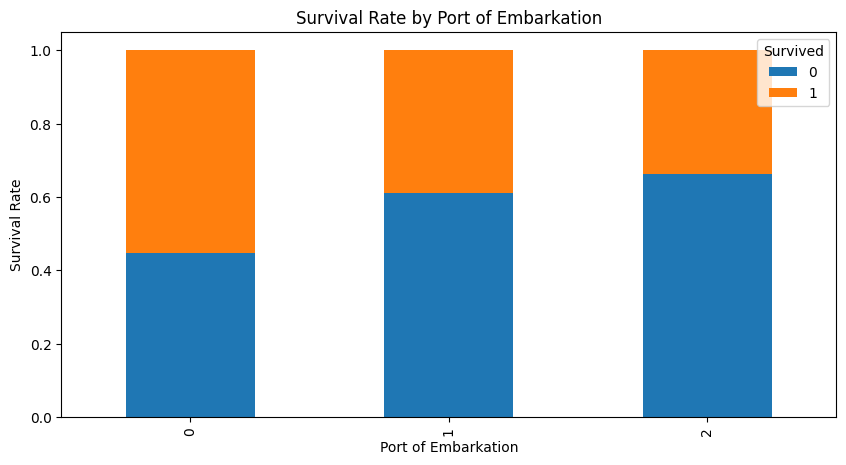

In [22]:
embarked_val_xt = pd.crosstab(df_train['Embarked_Val'], df_train['Survived'])
embarked_val_xt_pct = \
    embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

It appears those that embarked in location 'C': 1 had the highest rate of survival. We'll dig in some more to see why this might be the case. Below we plot a graphs to determine gender and passenger class makeup for each port:

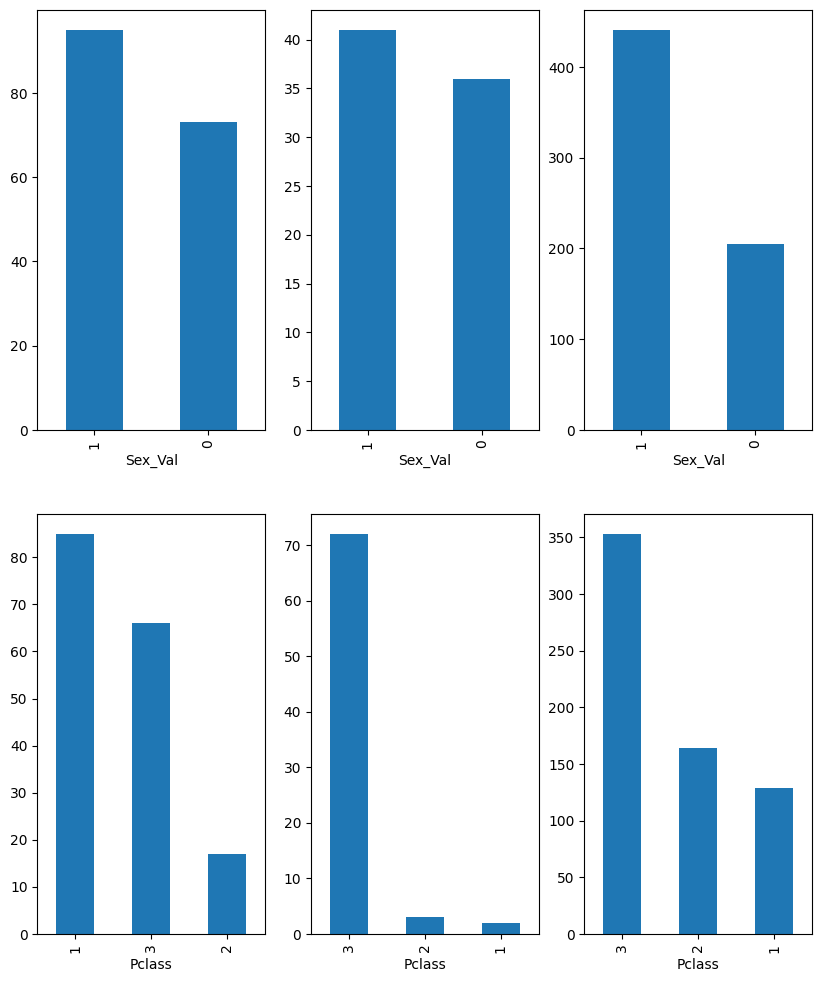

In [23]:
#set up a grid of plots.
fig = plt.figure(figsize=(10,12))

rows = 2 
cols = 3
cols_names = ('Sex_Val','Pclass')

for portIdx in embarked_locs:
    port_num = embarked_locs_mappings[portIdx]
    for colIdx in range(0, len(cols_names)):
        plt.subplot2grid((rows, cols), (colIdx, port_num))
        df_train[df_train['Embarked_Val'] == port_num][cols_names[colIdx]] \
            .value_counts().plot(kind='bar')

Feature: Age
The Age column seems like an important feature--unfortunately it is missing many values. We'll need to fill in the missing values like we did with Embarked.

Filter to view missing Age values:

In [24]:
df_train[df_train['Age'].isnull()][['Sex','Pclass','Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


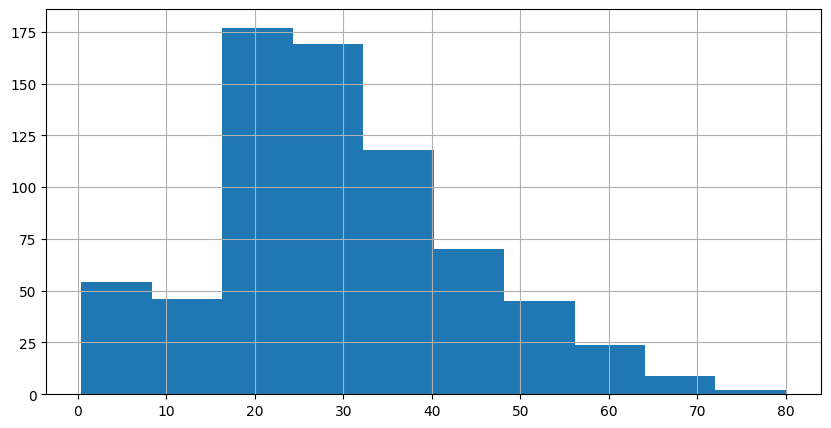

In [25]:
df_train['Age'].hist()
plt.show()

Determine the Age typical for each passenger class by Sex_Val. We'll use the median instead of the mean because the Age histogram seems to be right skewed

In [26]:
#make a copy of the Age column that we will use to fill the missing values.

df_train['AgeFill'] = df_train['Age']
#populate the AgeFill
median_ages_by_group = df_train.groupby(['Sex_Val', 'Pclass'])['Age'].transform('median')
df_train['AgeFill'] = df_train['AgeFill'].fillna(median_ages_by_group)

Ensure there are no nulls in the AgeFill.

In [27]:
len(df_train[df_train['AgeFill'].isnull()])

0

Plot a normalized cross tab for AgeFill and Survived:

Text(0, 0.5, 'Age')

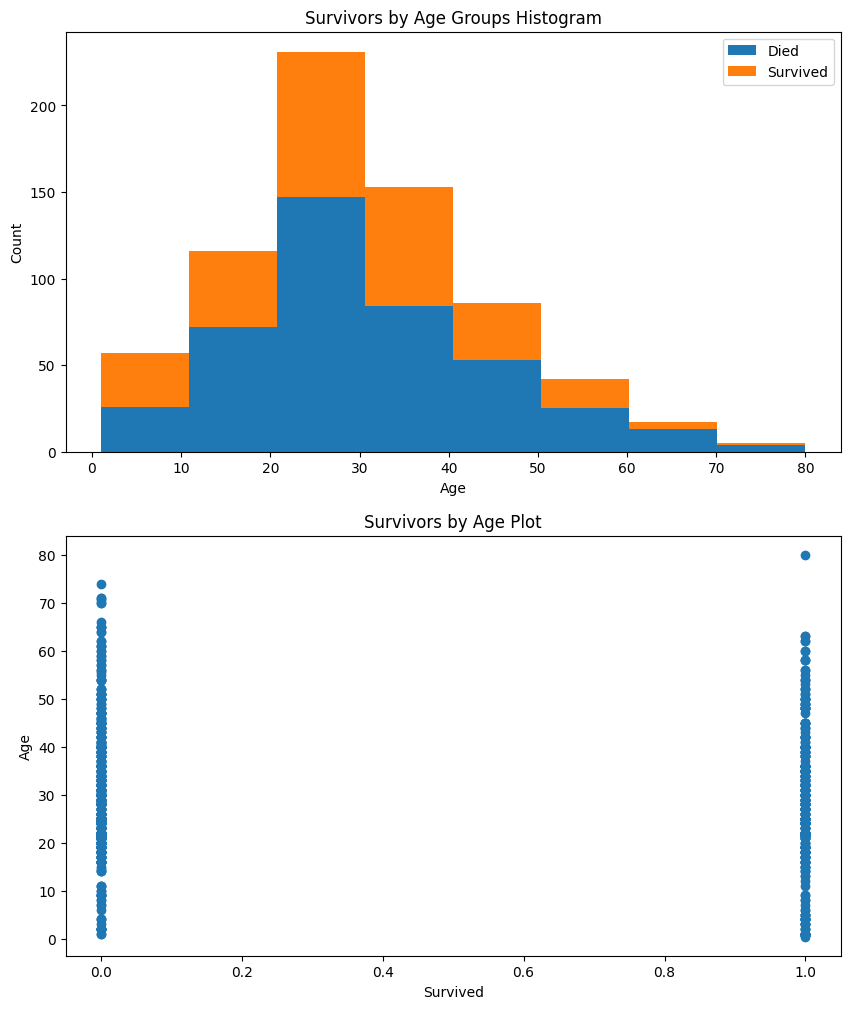

In [28]:
# Set up a grid of plots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Histogram of AgeFill segmented by Survived
df1 = df_train[df_train['Survived'] == 0]['Age']
df2 = df_train[df_train['Survived'] == 1]['Age']
max_age = max(df_train['AgeFill'])
axes[0].hist([df1, df2], 
             bins=int(max_age / bin_size), 
             range=(1, max_age), 
             stacked=True)
axes[0].legend(('Died', 'Survived'), loc='best')
axes[0].set_title('Survivors by Age Groups Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Scatter plot Survived and AgeFill
axes[1].scatter(df_train['Survived'], df_train['AgeFill'])
axes[1].set_title('Survivors by Age Plot')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Age')

Unfortunately, the graphs above do not seem to clearly show any insights. We'll keep digging further.

Plot AgeFill density by Pclass:

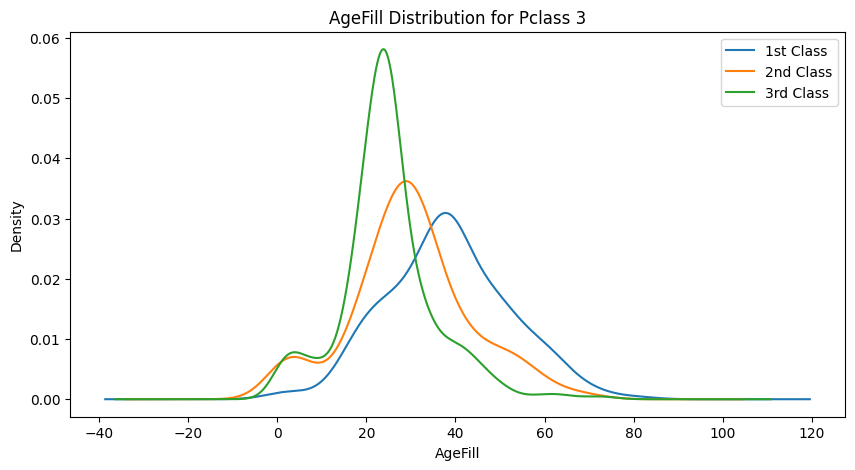

In [29]:
for Pclass in passenger_class:
    df_train.AgeFill[df_train.Pclass == Pclass].plot(kind= 'kde')
    plt.title(f'AgeFill Distribution for Pclass {Pclass}')
    plt.xlabel('AgeFill')
    plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

When looking at AgeFill density by Pclass, we see the first class passengers were generally older then second class passengers, which in turn were older than third class passengers. We've determined that first class passengers had a higher survival rate than second class passengers, which in turn had a higher survival rate than third class passengers.

<Axes: >

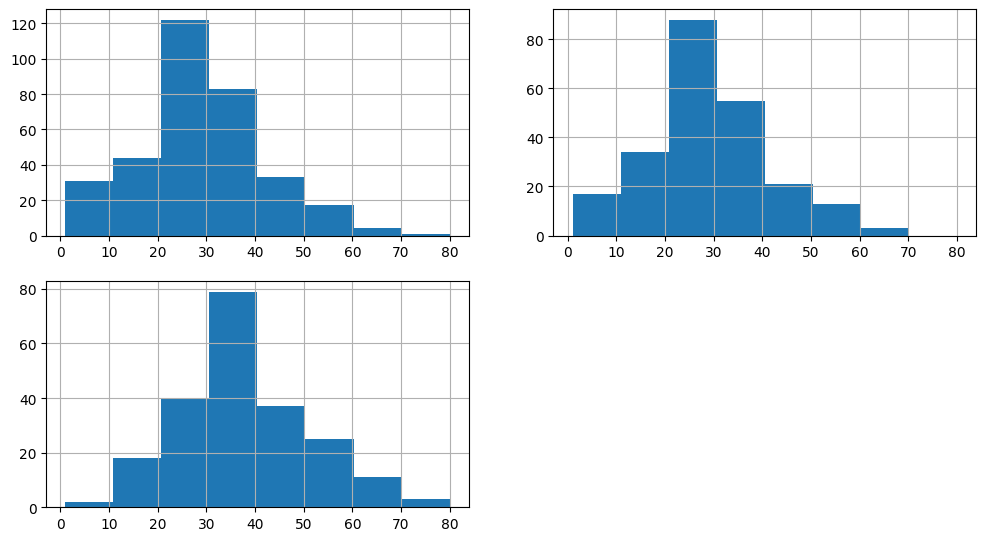

In [34]:
#set up a grid for plots 

fig = plt.figure(figsize=(12, 10))
fig_dims = (3,2)

#plot AgeFill for Survivors
plt.subplot2grid(fig_dims,(0, 0))
survived_df = df_train[(df_train['Survived']== 1) & (df_train['AgeFill'].notnull())]
survived_df['AgeFill'].hist(bins=int(max_age/bin_size), range = (1, max_age))

#plot AgeFill histogram for Females
plt.subplot2grid(fig_dims, (0, 1))
females_df = df_train[(df_train['Sex_Val']== 0) & df_train['Survived'] == 1]
females_df['AgeFill'].hist(bins=int(max_age/bin_size), range=(1, max_age))

#plot AgeFill histogram for first class passengers
plt.subplot2grid(fig_dims, (1, 0))
class1_df = df_train[(df_train['Pclass'] == 1) & (df_train['AgeFill'].notnull())]
class1_df['AgeFill'].hist(bins=int(max_age/bin_size), range=(1, max_age))


In the first graph, we see that most survivors come from the 20's to 30's age ranges and might be explained by the following two graphs. The second graph shows most females are within their 20's. The third graph shows most first class passengers are within their 30's.

Feature: Family Size
Feature enginering involves creating new features or modifying existing features which might be advantageous to a machine learning algorithm.

Define a new feature FamilySize that is the sum of Parch (number of parents or children on board) and SibSp (number of siblings or spouses):

In [35]:
df_train['FamilySize'] =  df_train['SibSp'] + df_train['Parch']
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2,35.0,0


plot a histogram of family size.

<Axes: >

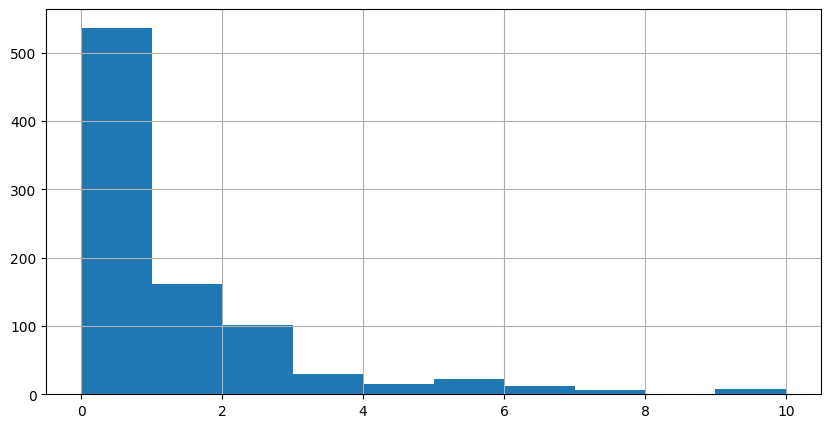

In [36]:
df_train['FamilySize'].hist()

Plot a histogram of AgeFill segmented by Survived:

Text(0.5, 1.0, 'Survivors by Family Size')

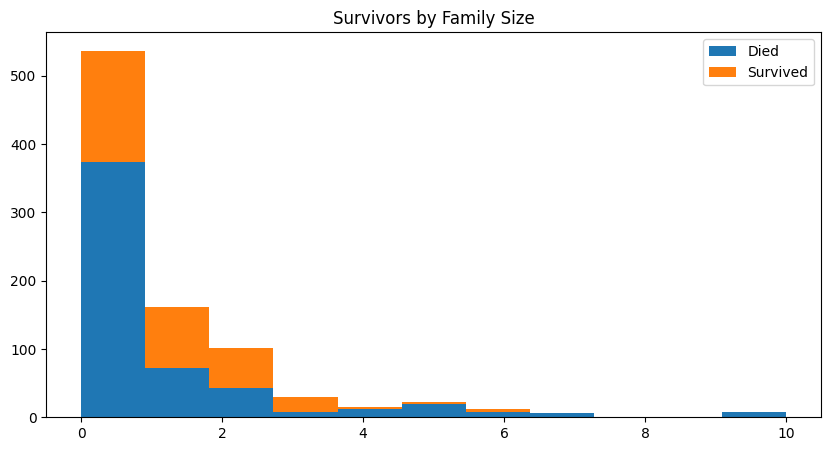

In [37]:
family_size = sorted(df_train['FamilySize'].unique())
family_size_max = max(family_size)

df1 = df_train[df_train['Survived'] ==0 ]['FamilySize']
df2 = df_train[df_train['Survived'] == 1]['FamilySize']
plt.hist([df1,df2]
           , bins=int(family_size_max + 1), 
           range=(0, family_size_max), 
           stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Family Size')

Based on the histograms, it is not immediately obvious what impact FamilySize has on survival. The machine learning algorithms might benefit from this feature.

Additional features we might want to engineer might be related to the Name column, for example honorrary or pedestrian titles might give clues and better predictive power for a male's survival.

Final Data Preparation for Machine Learning
Many machine learning algorithms do not work on strings and they usually require the data to be in an array, not a DataFrame.

Show only the columns of type 'object' (strings):

In [39]:
df_train.dtypes[df_train.dtypes.map(lambda x: x == 'object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

Drop the columns we won't use:

In [40]:
df_train = df_train.drop(['Name','Sex','Ticket','Cabin','Embarked'], axis=1)

Drop the following columns:

The Age column since we will be using the AgeFill column instead.
The SibSp and Parch columns since we will be using FamilySize instead.
The PassengerId column since it won't be used as a feature.
The Embarked_Val as we decided to use dummy variables instead.

In [41]:
df_train = df_train.drop(['Age', 'SibSp', 'Parch','PassengerId','Embarked_Val'], axis=1)
df_train.dtypes

Survived        int64
Pclass          int64
Fare          float64
Sex_Val         int32
AgeFill       float64
FamilySize      int64
dtype: object

Convert the DataFrame to a numpy array:

In [42]:
train_data = df_train.values
train_data

array([[ 0.    ,  3.    ,  7.25  ,  1.    , 22.    ,  1.    ],
       [ 1.    ,  1.    , 71.2833,  0.    , 38.    ,  1.    ],
       [ 1.    ,  3.    ,  7.925 ,  0.    , 26.    ,  0.    ],
       ...,
       [ 0.    ,  3.    , 23.45  ,  0.    , 21.5   ,  3.    ],
       [ 1.    ,  1.    , 30.    ,  1.    , 26.    ,  0.    ],
       [ 0.    ,  3.    ,  7.75  ,  1.    , 32.    ,  0.    ]])